<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/C4_Architecture_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C4 Architecture Examples

How to guide can be found in the read me.

In [1]:
#@title Install Diagrams
import os
result = os.system('pip install diagrams')
result = os.system('pip install httpimport')

In [2]:
#@markdown ## Get Repository
from urllib import request

baseUrl = "https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/"
[name, response] = request.urlretrieve(baseUrl + 'Repository/Repository.py', '_Repository.py')

In [3]:
#@markdown ## Settings

default_settings = {
  "show": False,
  "outformat": "png",
  "graph_attr":  {
    "splines": "spline",
    "fontsize": "10",
    "bgcolor": "lightgrey"
  },
  "node_attr": {
    "fontsize": "8px",
    "width": "1.8"
  }
} 

In [4]:
#@markdown ## Print Repository
from _Repository import Personas, Systems

Personas.Print()
Systems.Print()

---

## BankingCustomer

| Key         | Value       |
                   | ----------- | ----------- |
| id | BankingCustomer |
| nodeType | Person |
| name | Personal Banking Customer |
| description | A customer of the bank with
personal bank accounts |

---

## Email

| Key         | Value       |
                   | ----------- | ----------- |
| id | Email |
| nodeType | Custom |
| name | Email |
| description | The internal Microsoft Exchange Email system |
| technology | Exchange |

---

## BankingSystem

| Key         | Value       |
                   | ----------- | ----------- |
| id | BankingSystem |
| nodeType | System |
| name | Internet Banking System |
| description | Allows customers to view information about
their bank accounts, and make payments. |

---

## Mainframe

| Key         | Value       |
                   | ----------- | ----------- |
| id | Mainframe |
| nodeType | System |
| name | Mainframe Banking System |
| description | Store all of the core banking
information about customers,
accounts, transactions, etc. |
| technology | AS400 IBM Mainframe |

## System Context Diagram

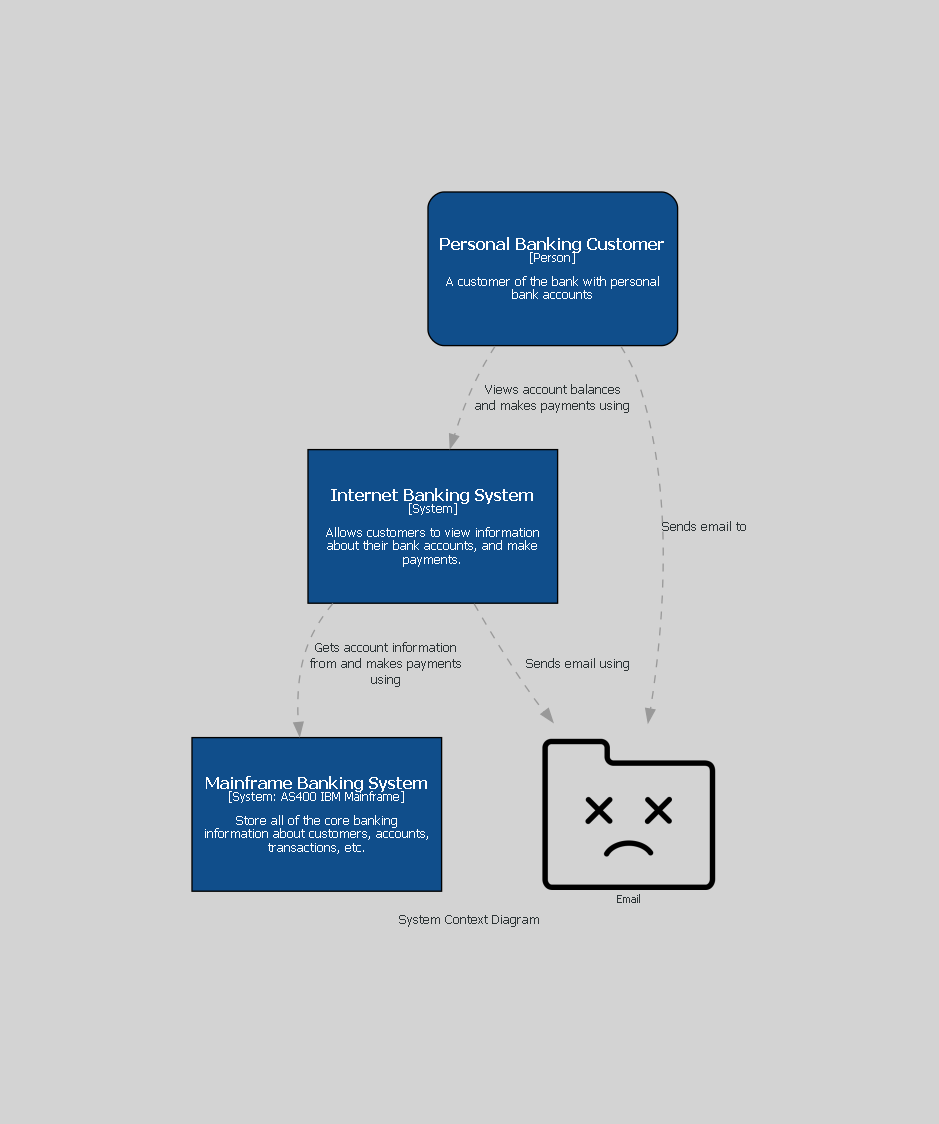

In [8]:
#@title System Context Diagram
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import Relationship
from _Repository import Personas, Systems

settings = { **default_settings, **{
  "name": "System Context Diagram",
  "direction": "TB"
}}

with Diagram(**settings) as diagram:
  customer = Personas.BankingCustomer.Get()
  banking = Systems.InternetBankingSystem.Get()
  email = Systems.Email.Get()
  mainframe = Systems.Mainframe.Get()

  customer >> Relationship("Sends email to") >> [email]
  customer >> Relationship("Views account balances and makes payments using") >> [banking]
  banking >> Relationship("Gets account information from and makes payments using") >> [mainframe]
  banking >> Relationship("Sends email using") >> [email]

display(Markdown("## " + settings["name"]))
display(diagram)

## Container Diagram

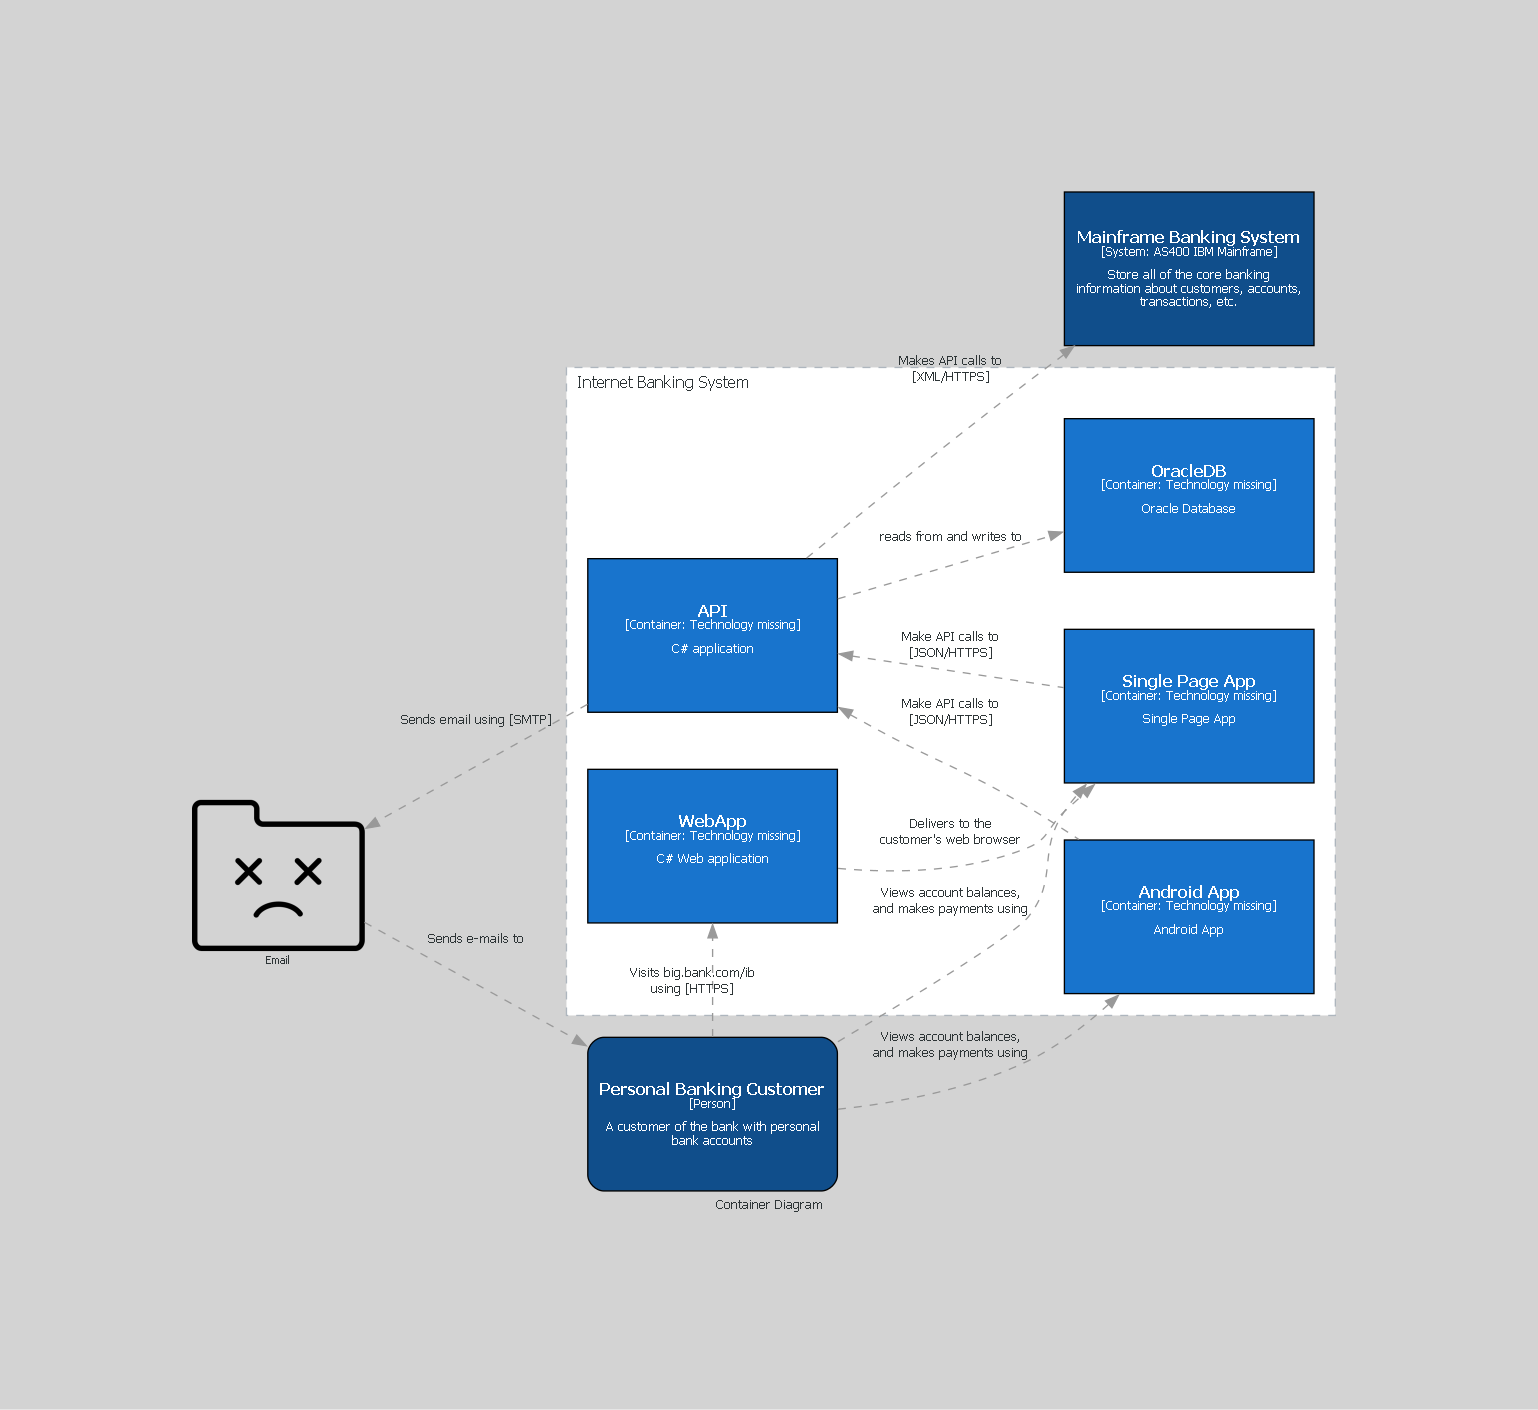

In [17]:
#@title Container Diagram
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _Repository import Personas, Systems, Applications

settings = { **default_settings, **{
  "name": "Container Diagram",
  "direction": "LR"
}}

with Diagram(**settings) as diagram:
  customer = Personas.BankingCustomer.Get()

  with SystemBoundary("Internet Banking System"):
    webapp = Applications.WebApp.Get()
    spa = Applications.SPA.Get()
    mobileApp = Applications.MobileApp.Get()
    api = Applications.API.Get()
    database = Applications.OracleDB.Get()

  email = Systems.Email.Get()
  mainframe = Systems.Mainframe.Get()

  customer >> Relationship("Visits big.bank.com/ib using [HTTPS]") >> [webapp]
  customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileApp]
  webapp >> Relationship("Delivers to the customer's web browser") >> [spa]
  api << Relationship("Make API calls to [JSON/HTTPS]") << [spa, mobileApp]
  api >> Relationship("reads from and writes to") >> [database]
  api >> Relationship("Sends email using [SMTP]") >> [email]
  api >> Relationship("Makes API calls to [XML/HTTPS]") >> [mainframe]
  email >> Relationship("Sends e-mails to") >> [customer]

display(Markdown("## " + settings["name"]))
display(diagram)

## Component Diagram

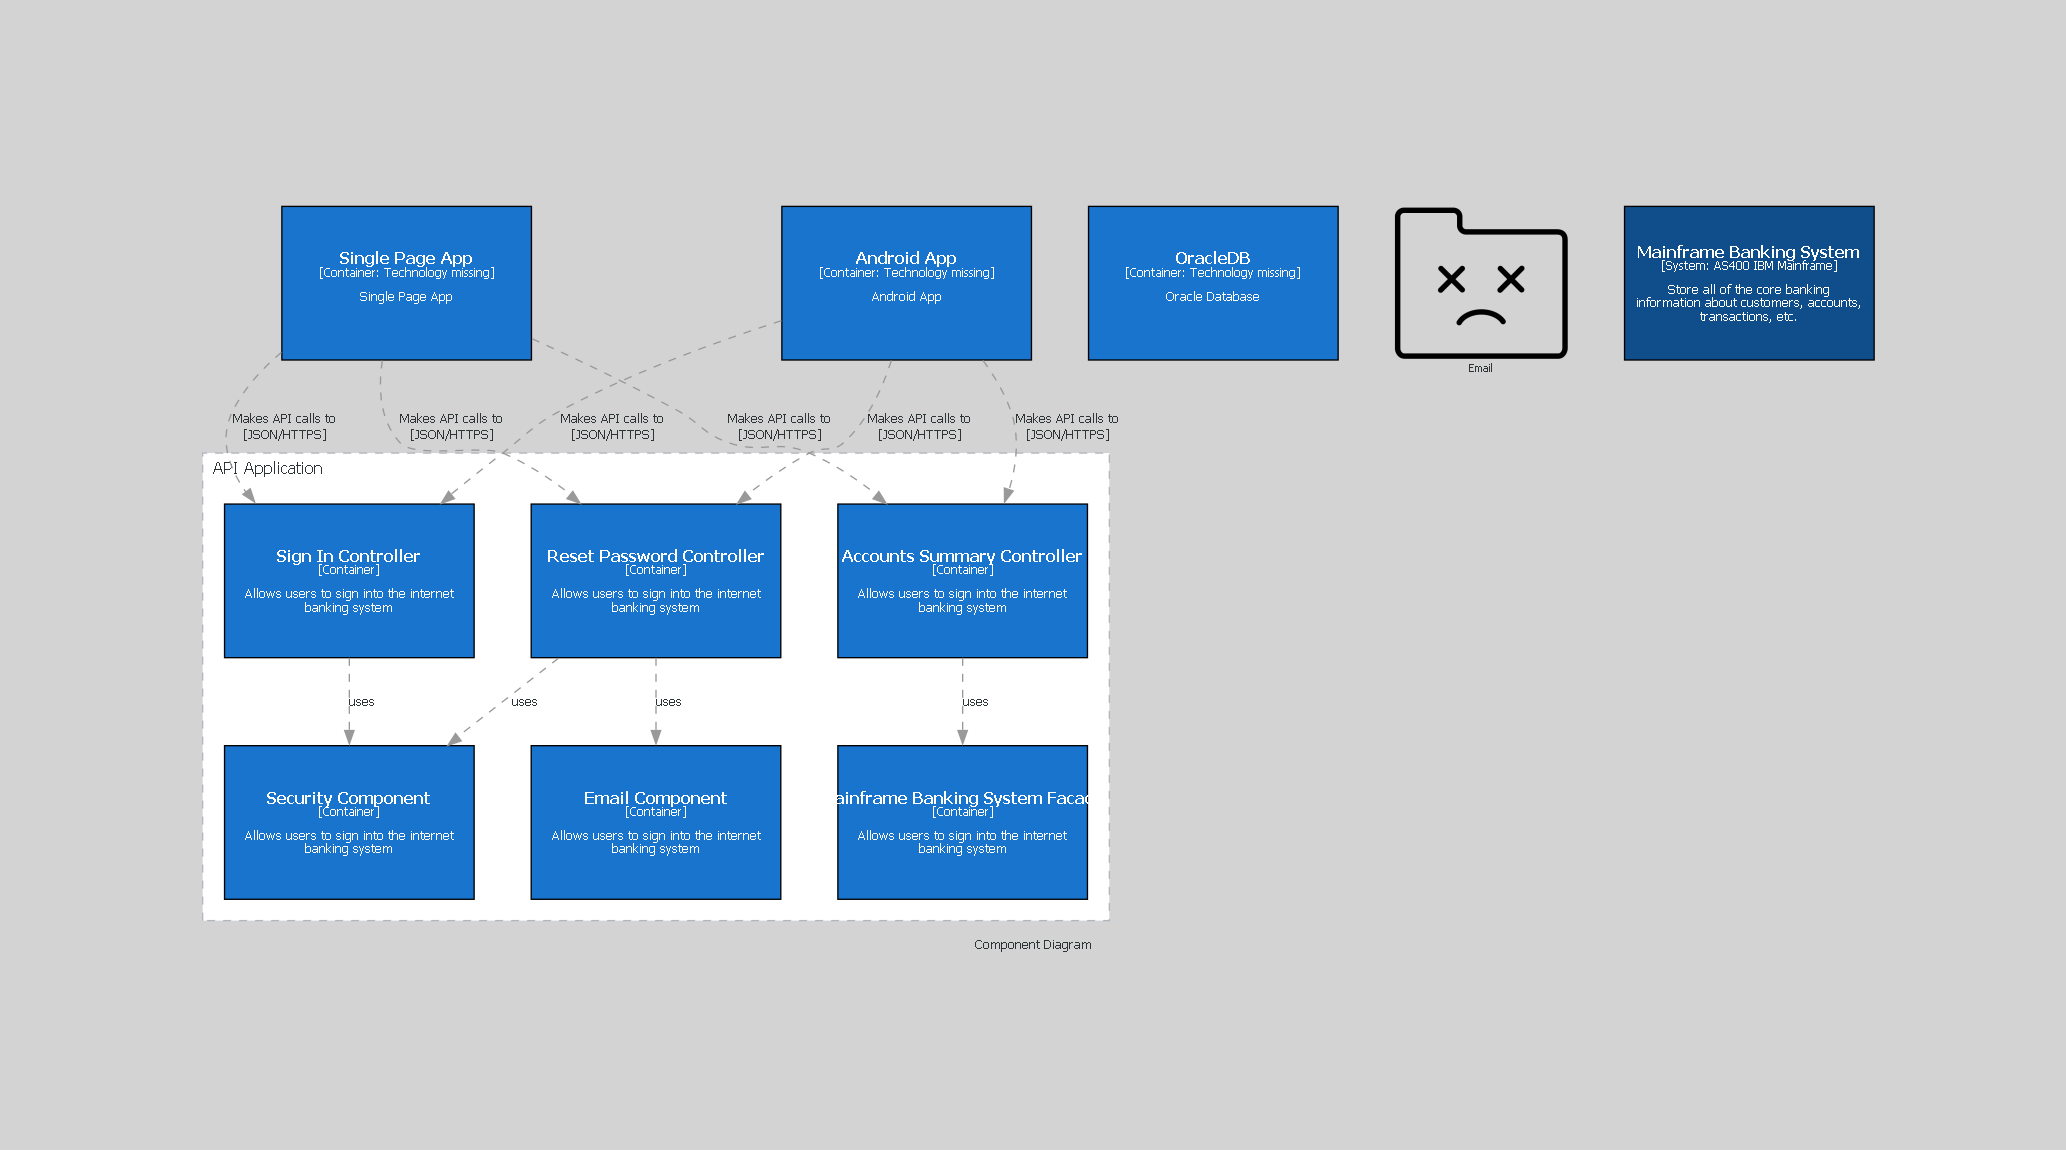

In [29]:
#@title Component Diagram
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship, Container
from diagrams.programming.flowchart import InputOutput
from _Repository import Personas, Systems, Applications

settings = { **default_settings, **{
  "name": "Component Diagram",
  "direction": "TB"
}}

with Diagram(**settings) as diagram:

  spa = Applications.SPA.Get()
  mobileApp = Applications.MobileApp.Get()

  with SystemBoundary("API Application"):
    signInController = Container("Sign In Controller", "Spring MVC Rest Controller", "Allows users to sign into the internet banking system")
    passwordController = Container("Reset Password Controller", "Spring MVC Rest Controller", "Allows users to reset their passwords with a single use URL")
    accountController = Container("Accounts Summary Controller", "Spring MVC Rest Controller", "Provides customers with a summary of their bank accounts")
    securityComponent = Container("Security Component", "Sprint Bean", "Provides functionality related to signing in, changing passwords, etc.")
    emailComponent = Container("Email Component", "Spring Bean", "Sends email to users")
    mainframeFacade = Container("Mainframe Banking System Facade", "Spring Bean", "A facade onto the mainframe banking system")
 
  database = Applications.OracleDB.Get()
  email = Systems.Email.Get()
  mainframe = Systems.Mainframe.Get()

  spa >> Relationship("Makes API calls to [JSON/HTTPS]") >> [signInController, passwordController, accountController]
  mobileApp >> Relationship("Makes API calls to [JSON/HTTPS]") >> [signInController, passwordController, accountController]

  signInController >> Relationship("Uses") >> [securityComponent]
  passwordController >> Relationship("Uses") >> [securityComponent, emailComponent]
  accountController >> Relationship("Uses") >> [mainframeFacade]

  securityComponent >> Relationship("Reads from and writes to") >> [database]
  emailComponent >> Relationship("Sends email using") >> [email]
  mainframeFacade >> Relationship("A facade onto the mainframe baking system") >> [mainframe]

display(Markdown("## " + settings["name"]))
display(diagram)